<a href="https://colab.research.google.com/github/isdeniz/results-1707/blob/main/nlbse22_paper_test_preds_llama3_70b_with_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Downloading ollama...
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [2]:
!pip install langchain
!pip install langchain-core
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.9 MB/s eta 0:00:00


In [3]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3:70b")

In [4]:
pip install tqdm

In [5]:
import pandas as pd
from tqdm import tqdm

In [6]:
test = pd.read_csv('data/github-labels-top3-803k-test.csv')
print('Number of issues: ', test.shape)

Number of issues:  (80518, 8)


In [7]:
test.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/is...,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0...",One more error might need to be caught.\r\n`4D...
1,19,https://api.github.com/repos/tisboyo/Twitch_Bo...,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN
2,25,https://api.github.com/repos/DrWhoCares/imgdan...,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Outp...,Could also add a method to open up path to eac...
3,30,https://api.github.com/repos/DrWhoCares/imgdan...,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and en...
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN


In [8]:
s = test.shape[0] // 1000
print(s)

80


In [9]:
x = 1

while x < (s+1):
    i = (x - 1) * 1000
    n = x * 1000
    with tqdm(total = (n - i), ncols = 100) as pbar:
        while i < n:
            try:
                test.loc[i,'llama3_70b_prediction'] = llm.invoke(f"""Considering the following issue where the issue title is "{test.loc[i,'issue_title']}" and the issue body is "{test.loc[i,'issue_body']}", please categorize this issue as "bug" or "enhancement" or "others" and provide your answer as a single word. Your answer should contain a single word.""")
                pbar.update(1)
                i = i + 1
            except:
                print('exception')
                continue
    test.to_pickle('data/test_preds_nlbse22_paper_llama3_70b.pkl')
    print(f'Categorization of {n} issues is complete')
    x = x + 1

100%|███████████████████████████████████████████████████████████| 1000/1000 [13:09<00:00,  1.27it/s]


Categorization of 1000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:52<00:00,  1.29it/s]


Categorization of 2000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:58<00:00,  1.28it/s]


Categorization of 3000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:56<00:00,  1.29it/s]


Categorization of 4000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:33<00:00,  1.23it/s]


Categorization of 5000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:35<00:00,  1.32it/s]


Categorization of 6000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:07<00:00,  1.27it/s]


Categorization of 7000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:33<00:00,  1.23it/s]


Categorization of 8000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:41<00:00,  1.22it/s]


Categorization of 9000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:18<00:00,  1.25it/s]


Categorization of 10000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:07<00:00,  1.27it/s]


Categorization of 11000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:26<00:00,  1.24it/s]


Categorization of 12000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:03<00:00,  1.28it/s]


Categorization of 13000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:59<00:00,  1.28it/s]


Categorization of 14000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:54<00:00,  1.29it/s]


Categorization of 15000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:04<00:00,  1.27it/s]


Categorization of 16000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:16<00:00,  1.26it/s]


Categorization of 17000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:22<00:00,  1.25it/s]


Categorization of 18000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:35<00:00,  1.23it/s]


Categorization of 19000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:07<00:00,  1.27it/s]


Categorization of 20000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:03<00:00,  1.28it/s]


Categorization of 21000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:00<00:00,  1.28it/s]


Categorization of 22000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:22<00:00,  1.25it/s]


Categorization of 23000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:23<00:00,  1.24it/s]


Categorization of 24000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:40<00:00,  1.22it/s]


Categorization of 25000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:28<00:00,  1.24it/s]


Categorization of 26000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:46<00:00,  1.21it/s]


Categorization of 27000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:25<00:00,  1.24it/s]


Categorization of 28000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:22<00:00,  1.25it/s]


Categorization of 29000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:16<00:00,  1.25it/s]


Categorization of 30000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [15:02<00:00,  1.11it/s]


Categorization of 31000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [14:00<00:00,  1.19it/s]


Categorization of 32000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:22<00:00,  1.25it/s]


Categorization of 33000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:25<00:00,  1.24it/s]


Categorization of 34000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:56<00:00,  1.20it/s]


Categorization of 35000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:28<00:00,  1.24it/s]


Categorization of 36000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:31<00:00,  1.23it/s]


Categorization of 37000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:11<00:00,  1.26it/s]


Categorization of 38000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:19<00:00,  1.25it/s]


Categorization of 39000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:59<00:00,  1.28it/s]


Categorization of 40000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:27<00:00,  1.24it/s]


Categorization of 41000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:24<00:00,  1.24it/s]


Categorization of 42000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:12<00:00,  1.26it/s]


Categorization of 43000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:30<00:00,  1.23it/s]


Categorization of 44000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:32<00:00,  1.23it/s]


Categorization of 45000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [15:45<00:00,  1.06it/s]


Categorization of 46000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:30<00:00,  1.23it/s]


Categorization of 47000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:19<00:00,  1.25it/s]


Categorization of 48000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:39<00:00,  1.22it/s]


Categorization of 49000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:20<00:00,  1.25it/s]


Categorization of 50000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:37<00:00,  1.22it/s]


Categorization of 51000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:17<00:00,  1.25it/s]


Categorization of 52000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:22<00:00,  1.25it/s]


Categorization of 53000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:49<00:00,  1.30it/s]


Categorization of 54000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:56<00:00,  1.29it/s]


Categorization of 55000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:19<00:00,  1.25it/s]


Categorization of 56000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:16<00:00,  1.26it/s]


Categorization of 57000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:42<00:00,  1.22it/s]


Categorization of 58000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:58<00:00,  1.28it/s]


Categorization of 59000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:02<00:00,  1.28it/s]


Categorization of 60000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:01<00:00,  1.28it/s]


Categorization of 61000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:31<00:00,  1.33it/s]


Categorization of 62000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:49<00:00,  1.30it/s]


Categorization of 63000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:11<00:00,  1.26it/s]


Categorization of 64000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:28<00:00,  1.24it/s]


Categorization of 65000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:00<00:00,  1.28it/s]


Categorization of 66000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:44<00:00,  1.21it/s]


Categorization of 67000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:55<00:00,  1.29it/s]


Categorization of 68000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:01<00:00,  1.28it/s]


Categorization of 69000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:50<00:00,  1.30it/s]


Categorization of 70000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:02<00:00,  1.28it/s]


Categorization of 71000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:24<00:00,  1.24it/s]


Categorization of 72000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [12:41<00:00,  1.31it/s]


Categorization of 73000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:28<00:00,  1.24it/s]


Categorization of 74000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:32<00:00,  1.23it/s]


Categorization of 75000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:24<00:00,  1.24it/s]


Categorization of 76000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:37<00:00,  1.22it/s]


Categorization of 77000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:13<00:00,  1.26it/s]


Categorization of 78000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [13:23<00:00,  1.24it/s]


Categorization of 79000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [14:00<00:00,  1.19it/s]


Categorization of 80000 issues is complete


In [10]:
print(x)

81


In [11]:
i = (x - 1) * 1000
n = test.shape[0]
with tqdm(total = (n - i), ncols = 100) as pbar:
  while i < n:
    try:
      test.loc[i,'llama3_70b_prediction'] = llm.invoke(f"""Considering the following issue where the issue title is "{test.loc[i,'issue_title']}" and the issue body is "{test.loc[i,'issue_body']}", please categorize this issue as "bug" or "enhancement" or "others" and provide your answer as a single word. Your answer should contain a single word.""")
      pbar.update(1)
      i = i + 1
    except:
      print('exception')
      continue
test.to_pickle('data/test_preds_nlbse22_paper_llama3_70b.pkl')
print(f'Categorization of {n} issues is complete')

100%|█████████████████████████████████████████████████████████████| 518/518 [07:14<00:00,  1.19it/s]


Categorization of 80518 issues is complete


organize predictions

In [1]:
import pandas as pd

In [2]:
test = pd.read_pickle('data/test_preds_nlbse22_paper_llama3_70b.pkl')

In [3]:
test.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_70b_prediction
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/is...,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0...",One more error might need to be caught.\r\n`4D...,Bug
1,19,https://api.github.com/repos/tisboyo/Twitch_Bo...,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN,Enhancement
2,25,https://api.github.com/repos/DrWhoCares/imgdan...,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Outp...,Could also add a method to open up path to eac...,Enhancement
3,30,https://api.github.com/repos/DrWhoCares/imgdan...,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and en...,Bug
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN,Bug


In [4]:
test.tail()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_70b_prediction
80513,803384,https://api.github.com/repos/timescale/timesca...,question,2021-04-14T21:33:04Z,NONE,https://api.github.com/repos/timescale/timesca...,No Gap Fill with bucket size bigger then inser...,**Relevant system information:**\r\n\r\nPostgr...,Bug
80514,803392,https://api.github.com/repos/cockpit-project/c...,enhancement,2020-03-11T15:28:33Z,CONTRIBUTOR,https://api.github.com/repos/cockpit-project/c...,desktop: Support sandbox with webkit_web_conte...,Our Python-based WebKit desktop browser should...,Enhancement
80515,803398,https://api.github.com/repos/Homebrew/brew/iss...,bug,2021-04-21T15:02:49Z,NONE,https://api.github.com/repos/Homebrew/brew,Can't install watchman,### `brew config` output\n\n```shell\nHOMEBREW...,Bug
80516,803400,https://api.github.com/repos/kirbydesign/desig...,enhancement,2020-09-07T10:35:52Z,CONTRIBUTOR,https://api.github.com/repos/kirbydesign/desig...,[Enhancement] Optional top section of Kirby pa...,<!--**Mandatory steps to ensure alignment betw...,Enhancement
80517,803401,https://api.github.com/repos/penpot/penpot/iss...,bug,2021-04-21T21:25:16Z,NONE,https://api.github.com/repos/penpot/penpot,Script manage.sh wont work after install,**Describe the bug**\r\nAfter starting the app...,Bug


In [5]:
test['llama3_70b_prediction'].value_counts()

llama3_70b_prediction
Bug                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       40691
Enhancement       

In [6]:
test['llama3_70b_prediction'].unique()

array(['Bug', 'Enhancement', 'Others', 'enhancement', 'bug', 'others',
       'Support', 'Performance', 'Task', 'Docfix', 'Both', 'test',
       'ENHANCEMENT', 'Question', 'Clarification', 'Security', 'Test',
       'BUG', 'Rant', 'question', 'Mixed', 'Discussion', 'Enhancements',
       'Configuration', 'Refactor', 'Blocker', 'SPAM',
       'This is not an issue with youtube-dl, but rather a problem with the user\'s code. The error occurs because the `extract_info` method returns an empty list when there are no entries in the playlist.\n\nThe correct categorization for this issue would be "others", as it is not a bug or enhancement request, but rather a question about how to handle an expected behavior of the library.\n\nA possible solution to the problem could be to check if the `entries` list is empty before trying to access its first element:\n\n```\nwith YoutubeDL(YDL_OPTIONS) as ydl:\n    info = ydl.extract_info(f"ytsearch:{arg}", download=False)\n    if \'entries\' in info and l

In [7]:
len(test['llama3_70b_prediction'].unique())

44

In [8]:
test['llama3_70b_prediction_organized'] = test['llama3_70b_prediction']

arrange bug answers

In [15]:
bug_labels = {'Bug',
              'bug',
              'BUG',
              'The answer is: bug'}

test['llama3_70b_prediction_organized'] = test['llama3_70b_prediction_organized'].replace(bug_labels, 'bug')

arrange enhancement answers

In [16]:
enhancement_labels = {'Enhancement',
                      'enhancement',
                      'ENHANCEMENT',
                      'Enhancements'}

test['llama3_70b_prediction_organized'] = test['llama3_70b_prediction_organized'].replace(enhancement_labels, 'enhancement')

arrange others answers

In [17]:
other_labels = {'Others',
                'others',
                'Support',
                'Performance',
                'Task',
                'Docfix',
                'Both',
                'test',
                'Question',
                'Clarification',
                'Security',
                'Test',
                'Rant',
                'question',
                'Mixed',
                'Discussion',
                'Configuration',
                'Refactor',
                'Blocker',
                'SPAM',
                'Help',
                'patch',
                'security',
                'support',
                'Config',
                'RFI',
                'Refactoring',
                'Investigation',
                'Template',
                'technical',
                'Dúvida',
                'clarification'}

test['llama3_70b_prediction_organized'] = test['llama3_70b_prediction_organized'].replace(other_labels, 'question')

arrange long sentences from the csv

In [18]:
test.loc[24615,'llama3_70b_prediction_organized']

'This is not an issue with youtube-dl, but rather a problem with the user\'s code. The error occurs because the `extract_info` method returns an empty list when there are no entries in the playlist.\n\nThe correct categorization for this issue would be "others", as it is not a bug or enhancement request, but rather a question about how to handle an expected behavior of the library.\n\nA possible solution to the problem could be to check if the `entries` list is empty before trying to access its first element:\n\n```\nwith YoutubeDL(YDL_OPTIONS) as ydl:\n    info = ydl.extract_info(f"ytsearch:{arg}", download=False)\n    if \'entries\' in info and len(info[\'entries\']) > 0:\n        video_info = info[\'entries\'][0]\n        # do something with video_info\n    else:\n        print("No entries in the playlist")\n```\n\nThis code will prevent the `IndexError` from occurring when there are no entries in the playlist.'

In [19]:
print(test.loc[24615,'llama3_70b_prediction_organized'])

This is not an issue with youtube-dl, but rather a problem with the user's code. The error occurs because the `extract_info` method returns an empty list when there are no entries in the playlist.

The correct categorization for this issue would be "others", as it is not a bug or enhancement request, but rather a question about how to handle an expected behavior of the library.

A possible solution to the problem could be to check if the `entries` list is empty before trying to access its first element:

```
with YoutubeDL(YDL_OPTIONS) as ydl:
    info = ydl.extract_info(f"ytsearch:{arg}", download=False)
    if 'entries' in info and len(info['entries']) > 0:
        video_info = info['entries'][0]
        # do something with video_info
    else:
        print("No entries in the playlist")
```

This code will prevent the `IndexError` from occurring when there are no entries in the playlist.


In [20]:
test.loc[24615,'llama3_70b_prediction_organized'] = 'question'

In [21]:
test.loc[57748,'llama3_70b_prediction_organized']

'It seems like you\'re considering whether to deal with an issue titled "MuadDib90 Playtesting feedbacks" that has several sub-issues related to font, language, and gameplay mechanics.\n\nThe outcome of dealing with this issue appears to be relatively minor, as it involves resolving some playtesting feedbacks, fixing a font issue in certain languages, and addressing a bug with a counter on a specific map. While these issues might impact the user experience, they don\'t seem critical or game-breaking.\n\nGiven the effort required to resolve these issues, you might need to weigh the benefits against the resources needed to address them. If you have more pressing concerns or limited development bandwidth, it might be reasonable to prioritize other tasks over this issue.\n\nHowever, if you\'re looking to tidy up loose ends and improve the overall polish of your game, dealing with these issues could be a worthwhile investment of time and effort.'

In [22]:
print(test.loc[57748,'llama3_70b_prediction_organized'])

It seems like you're considering whether to deal with an issue titled "MuadDib90 Playtesting feedbacks" that has several sub-issues related to font, language, and gameplay mechanics.

The outcome of dealing with this issue appears to be relatively minor, as it involves resolving some playtesting feedbacks, fixing a font issue in certain languages, and addressing a bug with a counter on a specific map. While these issues might impact the user experience, they don't seem critical or game-breaking.

Given the effort required to resolve these issues, you might need to weigh the benefits against the resources needed to address them. If you have more pressing concerns or limited development bandwidth, it might be reasonable to prioritize other tasks over this issue.

However, if you're looking to tidy up loose ends and improve the overall polish of your game, dealing with these issues could be a worthwhile investment of time and effort.


In [23]:
test.loc[57748,'llama3_70b_prediction_organized'] = 'question'

In [24]:
print(test.loc[60649,'llama3_70b_prediction_organized'])

A templated issue report!

The issue title is "Regex not matching?" and the body describes an issue with the Funimation extractor, where the regex pattern matches in an external program but throws a `RegexNotFoundError` in the youtube-dl context.

To answer the question: **BUG**


In [25]:
test.loc[60649,'llama3_70b_prediction_organized'] = 'bug'

In [26]:
print(test.loc[71973,'llama3_70b_prediction_organized'])

Based on the provided information, here is a summary of the issue:

**Issue Title:** [prometheus-kube-stack] Fix check in API version for Ingress

**Summary:**

The user is experiencing an error when using Helm 3.5.3 and Kubernetes 1.18 with the kube-prometheus-stack chart (v15.2.0). The error message is "unable to recognize \"\": no matches for kind \"Ingress\" in version \"networking.k8s.io/v1\"". This issue is likely related to a known bug where the Ingress API version needs to be updated.

**Category:** Bug


In [27]:
test.loc[71973,'llama3_70b_prediction_organized'] = 'bug'

In [28]:
test['llama3_70b_prediction_organized'].value_counts()

llama3_70b_prediction_organized
bug            41396
enhancement    35725
question        3397
Name: count, dtype: int64

In [29]:
test['llama3_70b_prediction_organized'].unique()

array(['bug', 'enhancement', 'question'], dtype=object)

get the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
actual_labels = test['issue_label']
predicted_labels = test['llama3_70b_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

In [32]:
print(conf_matrix_df)

               bug  enhancement  question
bug          35304         4286       698
enhancement   3363        28379      1461
question      2729         3060      1238


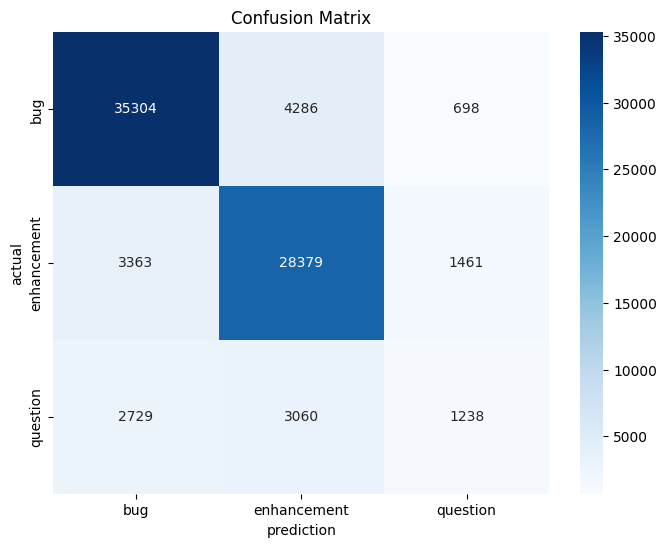

In [33]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.853     0.876     0.864     40288
 enhancement      0.794     0.855     0.823     33203
    question      0.364     0.176     0.238      7027

    accuracy                          0.806     80518
   macro avg      0.671     0.636     0.642     80518
weighted avg      0.786     0.806     0.793     80518



In [35]:
test.to_pickle('data/test_preds_nlbse22_paper_llama3_70b_organized.pkl')